In [1]:
from pathlib import Path
import struct
import numpy as np

def load_mnist(path, kind='train'):
    labels_path = path / Path("{}-labels-idx1-ubyte".format(kind))
    images_path = path / Path("{}-images-idx3-ubyte".format(kind))
    
    with labels_path.open('rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with images_path.open('rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

In [2]:
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows : {}, columns : {}'.format(X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows : {}, columns : {}'.format(X_test.shape[0], X_test.shape[1]))

Rows : 60000, columns : 784
Rows : 10000, columns : 784


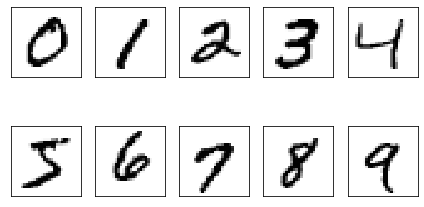

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

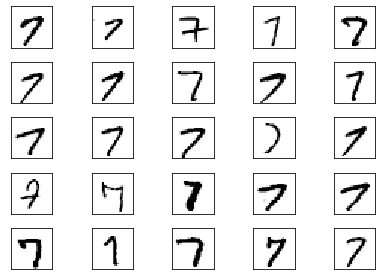

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train==7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [32]:
import importlib
import neuralnet 
importlib.reload(neuralnet)

nn = neuralnet.NeuralNetMLP(n_output=10,
                            n_features=X_train.shape[1],
                            n_hidden=50,
                            l2=0.1,
                            l1=0.0,
                            epochs=1000,
                            eta=0.001,
                            alpha=0.001,
                            decrease_const=0.00001,
                            shuffle=True,
                            minibatches=50,
                            random_state=1)
nn.fit(X_train, y_train, print_progress=True)

Epoch : 1000/1000

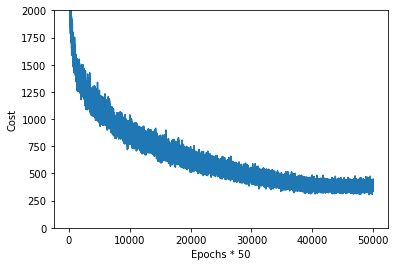

In [34]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.show()

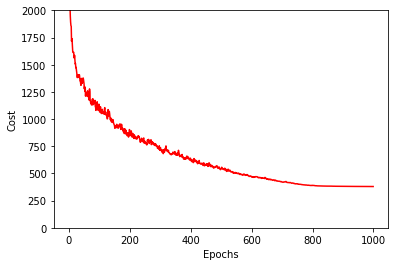

In [35]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [36]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train==y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy : {:.2f}'.format(acc * 100))

Training accuracy : 97.40


In [37]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test==y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy : {:.2f}'.format(acc * 100))

Test accuracy : 95.86


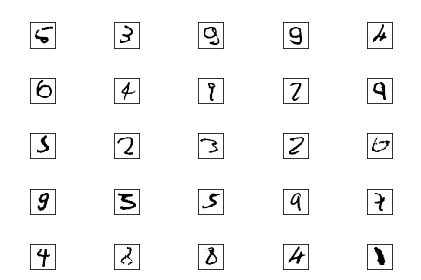

In [40]:
miscl_img = X_test[y_test!=y_test_pred][:25]
correct_lab = y_test[y_test!=y_test_pred][:25]
miscl_lab = y_test_pred[y_test!=y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('{:} t: {} p : {}'.format(i + 1, correct_lab[i], miscl_lab[i]), color='white')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [47]:
import neuralnet
importlib.reload(neuralnet)

nn_check = neuralnet.MLPGradientCheck(n_output=10,
                                      n_features=X_train.shape[1],
                                      n_hidden=10,
                                      l2=0.0,
                                      l1=0.0,
                                      epochs=10,
                                      eta=0.001,
                                      alpha=0.0,
                                      decrease_const=0.0,
                                      minibatches=1,
                                      random_state=1)
nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

OK: 2.6322412506459455e-10
OK: 2.940560465957112e-10
OK: 2.944171550323622e-10
OK: 2.976597965649259e-10
OK: 2.666763308631167e-10
OK: 2.909349404040742e-10
OK: 2.935664208600547e-10
OK: 2.570858517297691e-10
OK: 3.365365350785252e-10
OK: 3.0878428476919505e-10
